In [1]:
import librosa
import torch 

from whisperx.vad import load_vad_model ,merge_chunks
from whisperx.default_options import DEFAULT_VAD_OPTIONS

vad_model = load_vad_model(torch.device('cuda'), use_auth_token=None, **DEFAULT_VAD_OPTIONS)

/home/ubuntu/.local/lib/python3.8/site-packages/pyannote/audio/core/io.py:43: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
torchvision is not available - cannot save figures
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../.cache/torch/whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.2.1+cu121. Bad things might happen unless you revert torch to 1.x.
{'onset': 0.5, 'offset': 0.363, 'min_duration_on': 0.0, 'min_duration_off': 0.0}


In [23]:
y, sr = librosa.load("/home/ubuntu/digimon.wav", sr=16000)
vad_segments = vad_model({
    "waveform": torch.from_numpy(y).unsqueeze(0),
    "sample_rate": sr
})

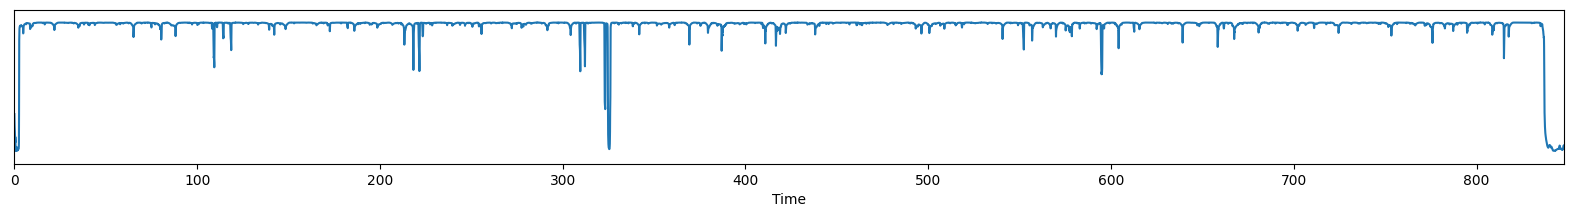

In [24]:
vad_segments

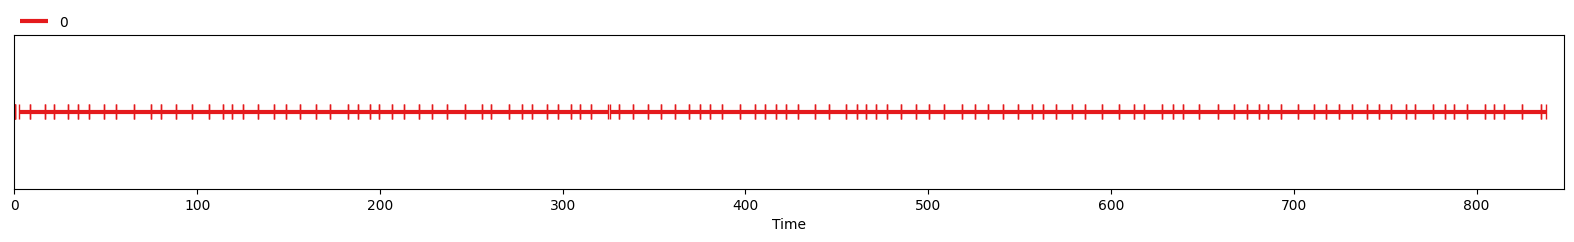

In [29]:
from whisperx.vad import Binarize 
binarize = Binarize(max_duration=10, onset=0.1, offset=0.3)
merged_segments = binarize(vad_segments)
merged_segments

In [31]:
# len(list(merged_segments._tracks.values()))

innert_binarize = Binarize(max_duration=5, onset=0.1, offset=0.1)
for seg in list(merged_segments._tracks.keys()):
    # Keep the original start and end time. 
    start, end = seg.start, seg.end 
    # For the segments longer than 5 seconds, make additional binarization step. 
    if end - start > 5:
        


[ 00:00:02.500 -->  00:00:08.609]
[ 00:00:08.609 -->  00:00:16.578]
[ 00:00:16.578 -->  00:00:21.885]
[ 00:00:21.885 -->  00:00:29.394]
[ 00:00:29.394 -->  00:00:34.974]
[ 00:00:34.974 -->  00:00:41.100]
[ 00:00:41.100 -->  00:00:49.001]
[ 00:00:49.001 -->  00:00:55.827]
[ 00:00:55.827 -->  00:01:05.179]
[ 00:01:05.179 -->  00:01:14.974]
[ 00:01:14.974 -->  00:01:20.349]
[ 00:01:20.349 -->  00:01:28.199]
[ 00:01:28.199 -->  00:01:37.226]
[ 00:01:37.226 -->  00:01:46.680]
[ 00:01:46.680 -->  00:01:54.240]
[ 00:01:59.240 -->  00:02:05.179]
[ 00:02:05.179 -->  00:02:13.353]
[ 00:02:13.353 -->  00:02:22.175]
[ 00:02:22.175 -->  00:02:28.387]
[ 00:02:28.387 -->  00:02:36.237]
[ 00:02:36.237 -->  00:02:45.281]
[ 00:02:45.281 -->  00:02:52.585]
[ 00:02:52.585 -->  00:03:02.414]
[ 00:03:02.414 -->  00:03:08.011]
[ 00:03:08.011 -->  00:03:14.428]
[ 00:03:14.428 -->  00:03:19.496]
[ 00:03:19.496 -->  00:03:26.817]
[ 00:03:26.817 -->  00:03:33.370]
[ 00:03:33.370 -->  00:03:41.595]
[ 00:03:41.595

In [4]:
vad_segments.__dict__

{'sliding_window': <pyannote.core.segment.SlidingWindow at 0x7fd44d639520>,
 'data': array([[7.1788423e-02],
        [4.6924505e-02],
        [3.5449576e-02],
        ...,
        [1.2784326e-03],
        [3.5490906e-05],
        [3.5971316e-05]], dtype=float32),
 'labels': None,
 '_SlidingWindowFeature__i': -1}

In [5]:
vad_segments.sliding_window.__dict__

{'_SlidingWindow__duration': 0.017064846416382253,
 '_SlidingWindow__step': 0.017064846416382253,
 '_SlidingWindow__start': 0.0,
 '_SlidingWindow__end': inf,
 '_SlidingWindow__i': -1}

In [6]:
vad_segments.data.shape

(49694, 1)

In [7]:
num_frames, num_classes = vad_segments.data.shape


In [8]:
# merge_chunks step by step 
from whisperx.vad import Binarize 


curr_end = 0 
merged_segments = []
seg_idxs = []
speaker_idxs = []

binarize = Binarize(max_duration=5, onset=0.5, offset=None)
segments = binarize(vad_segments)


In [10]:
#